In [ ]:
#Importing necessary libraries

import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Import Linear Regression for regression tasks
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestClassifier for regression tasks
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the data and printing the first 5 rows of dataset
data=pd.read_csv('/content/1651277648862_healthinsurance.csv')
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,male,64,24.3,NoDisease,1,0,NewYork,72,0,0,Actor,13112.6
1,49.0,female,75,22.6,NoDisease,1,0,Boston,78,1,1,Engineer,9567.0
2,32.0,female,64,17.8,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.2
3,61.0,female,53,36.4,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.6
4,19.0,female,50,20.6,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.7


In [ ]:
print('No. of rows:', data.shape[0])
print('No. of columns', data.shape[1])

No. of rows: 15000
No. of columns 13


In [ ]:
#Find the null values from the dataset
data.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [ ]:
#Find the mean of age and bmi of the given dataset
mean_age= data['age'].mean()
print('Age mean:',mean_age)

mean_bmi= data['bmi'].mean()
print('Bmi mean:',mean_bmi)

print('\n')
#Replace the null values in age and bmi with the average(mean) of the dataset
data['age'].fillna(value=mean_age, inplace=True)
data['bmi'].fillna(value=mean_bmi, inplace=True)

#Check the dataset after filling the null values
print('Null values after replacing nulls in age and bmi with mean of the respective data')
print('\n')
data.isnull().sum()

Age mean: 39.54752122706108
Bmi mean: 30.266412702933636


Null values after replacing nulls in age and bmi with mean of the respective data




age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64

In [ ]:
#Statistical data derived from dataset
data.describe(include='all')

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
count,15000.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000,15000.000000,15000.000000,15000.000000,15000,15000.000000
unique,NaN,2,NaN,NaN,10,NaN,NaN,91,NaN,NaN,NaN,35,NaN
top,NaN,female,NaN,NaN,NoDisease,NaN,NaN,NewOrleans,NaN,NaN,NaN,Student,NaN
freq,NaN,7652,NaN,NaN,13998,NaN,NaN,302,NaN,NaN,NaN,1320,NaN
mean,39.547521,NaN,64.909600,30.266413,NaN,1.129733,0.198133,NaN,68.650133,0.777000,0.224133,NaN,13401.437620
std,13.829705,NaN,13.701935,5.924606,NaN,1.228469,0.398606,NaN,19.418515,0.416272,0.417024,NaN,12148.239619
min,18.000000,NaN,34.000000,16.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,1121.900000
25%,27.000000,NaN,54.000000,25.900000,NaN,0.000000,0.000000,NaN,64.000000,1.000000,0.000000,NaN,4846.900000
50%,40.000000,NaN,63.000000,29.800000,NaN,1.000000,0.000000,NaN,71.000000,1.000000,0.000000,NaN,9545.650000
75%,51.000000,NaN,76.000000,34.100000,NaN,2.000000,0.000000,NaN,80.000000,1.000000,0.000000,NaN,16519.125000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [ ]:
#For calculation/Prediction we have to calculate the object data to integer
#Object types: "Sex", "hereditary_diseases", "City", "job_title"

le = LabelEncoder()
#Converting 'Sex' values to unique values (int)
data['sex'].unique()
data['sex'].replace('female', 0, inplace=True)
data['sex'].replace('male', 1, inplace=True)

#Converting 'hereditary_diseases' values to unique values (int)
data['hereditary_diseases'].unique()
data['hereditary_diseases']= data['hereditary_diseases'].map({'NoDisease' :0, 'Epilepsy' :1, 'EyeDisease' :2, 'Alzheimer' :3, 'Arthritis' :4, 'HeartDisease' :5, 'Diabetes' :6, 'Cancer' :7, 'High BP' :8, 'Obesity' :9})
data['hereditary_diseases'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#Converting 'City' to unique values (int)
data['city'].unique()
data['city']=le.fit_transform(data['city'])
data['city'].unique()

#Converting 'job_titles' to unique values (int)
data['job_title'].unique()
data['job_title']=le.fit_transform(data['job_title'])
data['job_title'].unique()

#After processing the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int64  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int64  
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


<Axes: >

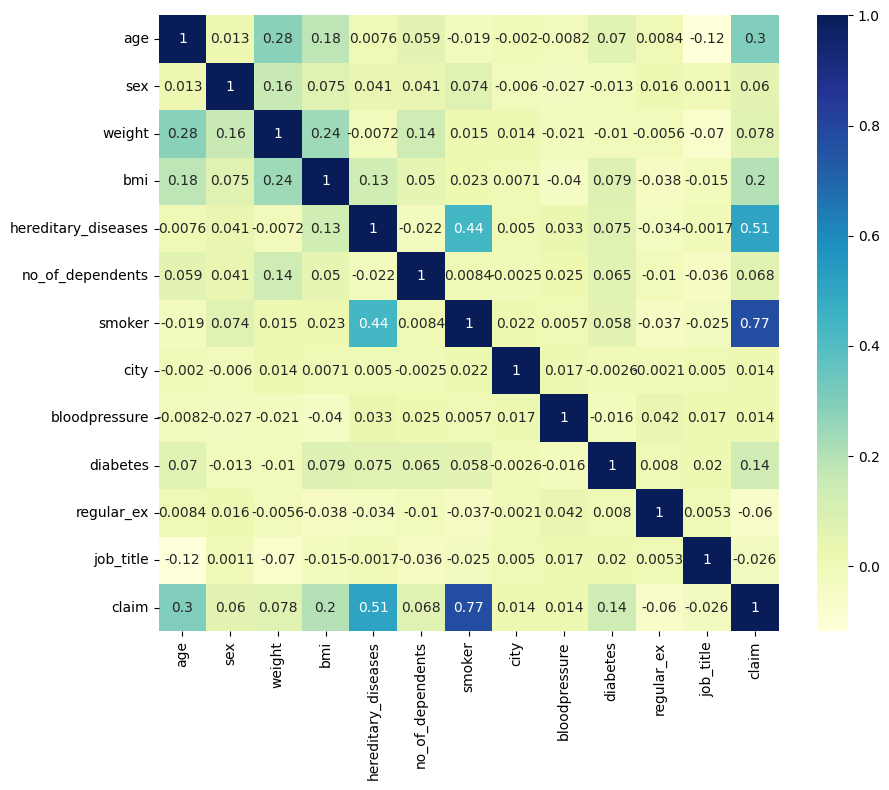

In [ ]:
#create a correlation matrix for the given data
correlation=data.corr()

#create a heatmap for it
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cmap='YlGnBu', annot=True)

In [ ]:
#Splitting the dataset into train and test dataset with 0.2 test size
x_train, x_test, y_train, y_test = train_test_split(data.drop('claim', axis=1), data['claim'], test_size=0.2, random_state=42)
print('\n')
print('x testing data')
print('\n')
print(x_test.head())
print('**********************************************************************')
print('\n')
print('Y testing data')
print('\n')
print(y_test.head())

#here X and Y are separated in features and target columns
#In which Y is insurance claim and x is other aspects than claim



x testing data


        age  sex  weight        bmi  hereditary_diseases  no_of_dependents  \
11499  50.0    1      47  32.200000                    0                 0   
6475   19.0    0      45  18.600000                    0                 0   
13167  32.0    0      46  31.500000                    0                 1   
862    55.0    0      63  30.266413                    0                 0   
5970   27.0    1      90  30.266413                    0                 3   

       smoker  city  bloodpressure  diabetes  regular_ex  job_title  
11499       0    46             80         1           0         22  
6475        0    13             60         1           1         26  
13167       0    56            106         1           1          1  
862         0    89             70         1           1         14  
5970        0    85             68         1           0         30  
**********************************************************************


Y testing data


11

In [ ]:
#Initialize and train Linear regression model
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Initialize and train Random forest regressor model
rt = RandomForestRegressor()
rt.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
#predict the value using LR model
y_1=lr.predict(x_test)

#predict using RFR model
y_2=rt.predict(x_test)

pd.DataFrame({'Acutal':y_test, 'LR':y_1, 'RT':y_2})

,Acutal,LR,RT
11499,8835.3,12682.416045,8835.300
6475,2134.9,925.146282,2583.243
13167,5148.6,7011.110666,5148.600
862,10704.5,11868.577020,10691.311
5970,4260.7,5908.251384,4260.700
...,...,...,...
6216,12032.3,8793.573426,12049.239
3585,11658.4,12223.322920,11658.400
10023,11085.6,12919.730363,11085.600
14044,2166.7,3771.385204,2166.021


Text(0.5, 1.0, 'Residual plot for LR')

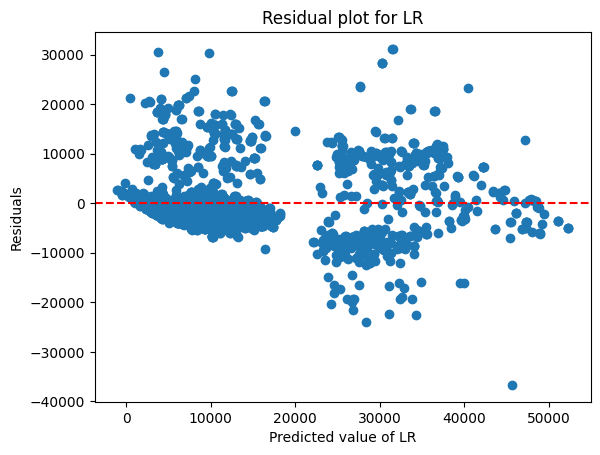

In [ ]:
#Graph between the actual values and the residuals for LR
diff= y_test - y_1
plt.scatter(y_1, diff)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted value of LR')
plt.ylabel('Residuals')
plt.title('Residual plot for LR')

Text(0.5, 1.0, 'Residual plot for RFR')

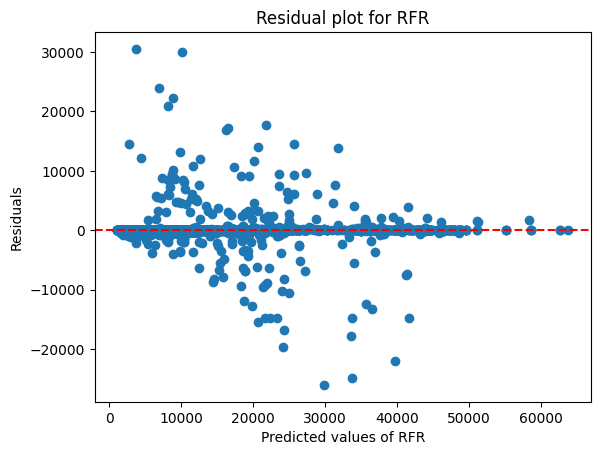

In [ ]:
#Graph between the predicted value and residuals for RFR
diff= y_test - y_2
plt.scatter(y_2, diff)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values of RFR')
plt.ylabel('Residuals')
plt.title('Residual plot for RFR')

From both of the above graphs of (LR) and (RFR), we can say that the Random Forest Regressor is giving more accurate results than Linear Regression Model.

In [ ]:
#find the R-Sqaured values for LR model
lr_r2=r2_score(y_test, y_1)

#find the R-Sqaured values for RFR model
rt_r2=r2_score(y_test, y_2)

print("R-Squared value for LR model:",round(lr_r2,4))
print("R-Squared value for RFR model:",round(rt_r2,4))

R-Squared value for LR model: 0.7491
R-Squared value for RFR model: 0.9677


The Random Forest Regressor (RFR) has an exceptionally high R-squared (R2) score of 0.9668, it excels in explaining approximately 96.68% of the variance in health insurance claim amounts. Because of that we can say that, the Random Forest Regressor is the most effective model for predicting health insurance claims in analysis.

In [ ]:
lr_mae=mean_absolute_error(y_test,y_1)
print('LR mae:',lr_mae)

rfr_mae=mean_absolute_error(y_test, y_2)
print('RFR mae:',rfr_mae)

LR mae: 4071.725236568479
RFR mae: 445.678797333342


In [ ]:
#Find the mean sqaured error for LR model
lr_mse= mean_squared_error(y_test, y_1)

#Find the mean sqaured error for RFR model
rt_mse= mean_squared_error(y_test, y_2)

print("Mean Squared Error for LR model:",round(lr_mse,4))
print("Mean Squared Error for RFR model:",round(rt_mse,4))

Mean Squared Error for LR model: 37473972.3923
Mean Squared Error for RFR model: 4824558.5998


A larger Mean Squared Error (MSE) implies that predicted values are dispersed widely around the actual test values, while a smaller MSE indicates the opposite. A smaller MSE is desirable because it signifies that predicted values are closely clustered around the actual test values, reflecting a more accurate prediction with fewer errors in terms of deviation from the true values and more accuarcy in Model.


* **Lesser the MSE => Smaller is the error => Better the estimator**

* Here, mse of RFR is smaller than mse of LR, indicating that the RFR is more accurate than the LR Model.



In [ ]:
#prediction on random new customer
prd = pd.DataFrame(x_train,index=[2])
prd #Prediction Data

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title
2,32.0,0,64,17.8,1,2,1,63,88,1,1,0


In [ ]:
#Predict the claim for LR model
lr_pre= lr.predict(prd)
print('Predicted claim for LR model:', lr_pre)

#Predict the claim for RFR model
rt_pre=rt.predict(prd)
print('Predicted claim for RFR model:', rt_pre)

Predicted claim for LR model: [26290.51375873]
Predicted claim for RFR model: [32781.702]


In [ ]:
#Actual value of data
print('Actual value of data', y_train[2])

Actual value of data 32734.2


From the above predicted values and actual value we can say that Random Forest regressor is more accurate than Linear regression Model.

In [ ]:
#Take input of sample data from user:
age=float(input('Enter the age of the person:'))
sex=int(input("enter the gender (0: Female, 1: Male):"))
weight=int(input('Enter the weight of the person:'))
bmi=float(input('Enter the bmi of the person:'))
diseases=int(input('Enter the disease (b/w 0 to 9):'))
depend=int(input('Enter the no. of dependents:'))
smoker=int(input('Is the person smoker (0: No, 1: Yes):'))
city=int(input('Enter the city (b/w 0 to 90):'))
bp=int(input('Enter the blood pressure of the person:'))
diab=int(input('is the person diabetic (0: No, 1: Yes):'))
exercise=int(input('Does the person execises regularly (0: No, 1: Yes):'))
job=int(input('Enter the job of the person (b/w 0 to 34):'))

# Create a dictionary with the sample data
sample_data = {
    'age': [age],
    'sex': [sex],
    'weight': [weight],
    'bmi': [bmi],
    'hereditary_diseases': [diseases],
    'no_of_dependents': [depend],
    'smoker': [smoker],
    'city': [city],
    'bloodpressure': [bp],
    'diabetes': [diab],
    'regular_ex': [exercise],
    'job_title': [job]
}
print('\n')
# Convert the input data into a DataFrame
sample = pd.DataFrame(sample_data, index=[0])  # Provide index as [0]
print(sample)

Enter the age of the person:25
enter the gender (0: Female, 1: Male):0
Enter the weight of the person:36
Enter the bmi of the person:225
Enter the disease (b/w 0 to 9):0
Enter the no. of dependents:5
Is the person smoker (0: No, 1: Yes):0
Enter the city (b/w 0 to 90):0
Enter the blood pressure of the person:85
is the person diabetic (0: No, 1: Yes):0
Does the person execises regularly (0: No, 1: Yes):0
Enter the job of the person (b/w 0 to 34):0


    age  sex  weight    bmi  hereditary_diseases  no_of_dependents  smoker  \
0  25.0    0      36  225.0                    0                 5       0   

   city  bloodpressure  diabetes  regular_ex  job_title  
0     0             85         0           0          0  


In [ ]:
claim=rt.predict(sample)
print('Predicted Insurance claim:', claim)

claim_lr=lr.predict(sample)
print('Predicted value using linear regression in', claim_lr)

Predicted Insurance claim: [13911.974]
Predicted value using linear regression in [49556.41339591]


In [ ]:
import joblib

In [ ]:
joblib.dump(lr,"lr.cnn")

['lr.cnn']